In [45]:
### Data handling imports
import pandas as pd
import numpy as np

import reverse_geocoder as rg
import unidecode

### Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
import copy

sns.set()
%matplotlib inline
%load_ext lab_black
import os
from collections import Counter
from collections import OrderedDict
from operator import itemgetter

import json

# Statistics imports
import scipy, scipy.stats

pd.set_option("display.max_columns", None)

import warnings

warnings.filterwarnings("ignore")

class color:
    BOLD = "\033[1m"
    UNDERLINE = "\033[4m"
    END = "\033[0m"

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [46]:
raceFileFolder = "twitter-race/"

In [143]:
df_cleaned_geocoding_tweets = pd.read_csv("twittes-with-geocoding-cleaned.csv")
df_cleaned_geocoding_tweets.head()

,created_at,id,id_str,text,truncated,geo,place,quote_count,reply_count,retweet_count,favorite_count,entities,lang,timestamp_ms,user_id_str,user_name,user_screen_name,user_location,user_description,user_verified,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count,user_created_at,user_utc_offset,user_geo_enabled,user_lang,user_default_profile,display_text_range,extended_entities,possibly_sensitive,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,CountyId
0,2020-03-19 10:59:57+00:00,1240593849694605312,1240593849694605312,current weather in Burlington: overcast clouds...,False,"[44.48, -73.21]","{'id': '8f07721fe6eb5c41', 'url': 'https://api...",0.0,0.0,0.0,0.0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,2020-03-19 10:59:57.543,1.120347e+08,Burlington Weather,BurlingtonVT,"Burlington, VT","Weather updates, forecast, warnings and inform...",False,120.0,1.0,14.0,0.0,37409.0,2010-02-07 01:44:27+00:00,NaN,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50007.0
1,2020-03-19 10:59:59+00:00,1240593857349218309,1240593857349218304,"Flash Flood Warning continues for Nixa MO, Oza...",False,"[36.82104014, -93.47691589]","{'id': '2526edd24c06e60c', 'url': 'https://api...",0.0,0.0,0.0,0.0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,2020-03-19 10:59:59.368,6.002270e+08,NWS Springfield,NWSSpringfield,"Springfield, Missouri",Official Twitter account for the National Weat...,True,33227.0,306.0,512.0,2396.0,17173.0,2012-06-05 16:24:58+00:00,NaN,True,NaN,False,"[0, 83]","{'media': [{'id': 1240593855927300098, 'id_str...",0.0,NaN,NaN,NaN,NaN,NaN,29209.0
2,2020-03-19 11:00:00+00:00,1240593862382489600,1240593862382489600,ee69b5dca7d2458d2039dc8f3e12c093a733e7b83d0618...,True,"[27.26026626, -166.01094411]",NaN,0.0,0.0,0.0,0.0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",fr,2020-03-19 11:00:00.568,3.048545e+09,GooGuns Lulz,googuns_lulz,(here),@victor_zheng,False,259.0,1.0,257.0,0.0,3973912.0,2015-02-21 03:26:23+00:00,NaN,True,NaN,False,NaN,NaN,NaN,{'full_text': 'ee69b5dca7d2458d2039dc8f3e12c09...,NaN,NaN,NaN,NaN,15007.0
3,2020-03-19 11:00:00+00:00,1240593862659149824,1240593862659149824,"Wind 0.0 mph NNW. Barometer 29.83 in, Rising s...",False,"[37.92583333, -120.63]","{'id': 'fbd6d2f5a4e4a15e', 'url': 'https://api...",0.0,0.0,0.0,0.0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,2020-03-19 11:00:00.634,8.653689e+08,Donald Price,DonaldPrice11,NaN,NaN,False,5.0,24.0,0.0,14.0,8142.0,2012-10-06 21:52:04+00:00,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6009.0
4,2020-03-19 11:00:02+00:00,1240593868438917126,1240593868438917120,"MED - MEDICAL at 6300 SE DIVISION ST, PORT [Po...",False,"[45.505914, -122.598196]","{'id': 'ac88a4f17a51c7fc', 'url': 'https://api...",0.0,0.0,0.0,0.0,"{'hashtags': [{'text': 'RP20000023885', 'indic...",en,2020-03-19 11:00:02.012,1.606472e+09,Mult Co Fire/EMS log,pdxfirelog,"Multnomah County, Oregon","Unofficial automated posting of Portland, Oreg...",False,2844.0,10.0,118.0,0.0,538176.0,2013-07-19 17:57:31+00:00,NaN,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41051.0


In [173]:
df_cleaned_geocoding_tweets.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'geo', 'place',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'lang', 'timestamp_ms', 'user_id_str', 'user_name',
       'user_screen_name', 'user_location', 'user_description',
       'user_verified', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_favourites_count', 'user_statuses_count',
       'user_created_at', 'user_utc_offset', 'user_geo_enabled', 'user_lang',
       'user_default_profile', 'display_text_range', 'extended_entities',
       'possibly_sensitive', 'extended_tweet', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
       'CountyId', 'Latitude', 'Longitude', 'pred_race', 'pred_race_asian',
       'pred_race_hispanic', 'pred_race_nh_black', 'pred_race_nh_white'],
      dtype='object')

In [104]:
df_race = pd.read_csv(raceFileFolder + "result_pred_fl_reg_name.csv")

In [105]:
df_race_2 = pd.read_csv(raceFileFolder + "result_pred_fl_reg_ln.csv")

In [106]:
df_race_3 = pd.read_csv(raceFileFolder + "result_pred_census_ln.csv")

In [120]:
print(df_race.head())
print(df_race_2.head())
print(df_race_3.head())

                    id  CountyId             user_name      race       first  \
0  1240593849694605312   50007.0    Burlington Weather  nh_white  Burlington   
1  1240593857349218309   29209.0       NWS Springfield  nh_black         NWS   
2  1240593862382489600   15007.0          GooGuns Lulz  nh_white     GooGuns   
3  1240593862659149824    6009.0          Donald Price  nh_black      Donald   
4  1240593868438917126   41051.0  Mult Co Fire/EMS log  nh_white        Mult   

              last     asian  hispanic  nh_black  nh_white  
0          Weather  0.002153  0.007876  0.023837  0.966134  
1      Springfield  0.000324  0.000561  0.985023  0.014092  
2             Lulz  0.005138  0.018987  0.379879  0.595997  
3            Price  0.026442  0.013025  0.481762  0.478771  
4  Co Fire/EMS log  0.016267  0.021247  0.148112  0.814373  
                    id  CountyId             user_name      race     asian  \
0  1240593849694605312   50007.0    Burlington Weather  nh_white  0.006612 

In [108]:
# find out the null value
df_race = df_race[df_race["hispanic"].notnull()]

In [110]:
df_race_2 = df_race_2[df_race_2["hispanic"].notnull()]

In [111]:
df_race_3 = df_race_3[df_race_3["hispanic"].notnull()]

In [112]:
print(df_race.shape, df_race_2.shape, df_race_3.shape)

(216971, 10) (256446, 8) (256446, 8)


In [119]:
df_race_3.rename(
    {"api": "asian", "black": "nh_black", "white": "nh_white"}, axis=1, inplace=True
)

In [121]:
df_race["race"].value_counts()

nh_white    154420
nh_black     36409
asian        16843
hispanic      9299
Name: race, dtype: int64

In [122]:
df_race_2["race"].value_counts()

nh_white    180205
nh_black     38054
hispanic     35349
asian         2838
Name: race, dtype: int64

In [124]:
df_race_3["race"].value_counts()

white       230069
hispanic     12528
api          11687
black         2162
Name: race, dtype: int64

In [144]:
# wapper latitude and longtitude
def get_lat_long(df):

    df["Latitude"] = [eval(x)[0] for x in df["geo"]]
    df["Longitude"] = [eval(x)[1] for x in df["geo"]]
    df = df.drop("geo", axis=1)
    return df


df_cleaned_geocoding_tweets = get_lat_long(df_cleaned_geocoding_tweets)

In [147]:
def find_most_frequent_name(df, df_race):
    df["pred_race"] = df_race["race"]
    df["pred_race_asian"] = df_race["asian"]
    df["pred_race_hispanic"] = df_race["hispanic"]
    df["pred_race_nh_black"] = df_race["nh_black"]
    df["pred_race_nh_white"] = df_race["nh_white"]
    return df

In [148]:
df_cleaned_geocoding_tweets = find_most_frequent_name(
    df_cleaned_geocoding_tweets, df_race_2
)

In [149]:
df_cleaned_geocoding_tweets.head()

,created_at,id,id_str,text,truncated,geo,place,quote_count,reply_count,retweet_count,favorite_count,entities,lang,timestamp_ms,user_id_str,user_name,user_screen_name,user_location,user_description,user_verified,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count,user_created_at,user_utc_offset,user_geo_enabled,user_lang,user_default_profile,display_text_range,extended_entities,possibly_sensitive,extended_tweet,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,CountyId,Latitude,Longitude,pred_race,pred_race_asian,pred_race_hispanic,pred_race_nh_black,pred_race_nh_white
0,2020-03-19 10:59:57+00:00,1240593849694605312,1240593849694605312,current weather in Burlington: overcast clouds...,False,"[44.48, -73.21]","{'id': '8f07721fe6eb5c41', 'url': 'https://api...",0.0,0.0,0.0,0.0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,2020-03-19 10:59:57.543,1.120347e+08,Burlington Weather,BurlingtonVT,"Burlington, VT","Weather updates, forecast, warnings and inform...",False,120.0,1.0,14.0,0.0,37409.0,2010-02-07 01:44:27+00:00,NaN,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50007.0,44.480000,-73.210000,nh_white,0.006612,0.018624,0.030158,0.944607
1,2020-03-19 10:59:59+00:00,1240593857349218309,1240593857349218304,"Flash Flood Warning continues for Nixa MO, Oza...",False,"[36.82104014, -93.47691589]","{'id': '2526edd24c06e60c', 'url': 'https://api...",0.0,0.0,0.0,0.0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,2020-03-19 10:59:59.368,6.002270e+08,NWS Springfield,NWSSpringfield,"Springfield, Missouri",Official Twitter account for the National Weat...,True,33227.0,306.0,512.0,2396.0,17173.0,2012-06-05 16:24:58+00:00,NaN,True,NaN,False,"[0, 83]","{'media': [{'id': 1240593855927300098, 'id_str...",0.0,NaN,NaN,NaN,NaN,NaN,29209.0,36.821040,-93.476916,nh_black,0.004408,0.007382,0.696614,0.291595
2,2020-03-19 11:00:00+00:00,1240593862382489600,1240593862382489600,ee69b5dca7d2458d2039dc8f3e12c093a733e7b83d0618...,True,"[27.26026626, -166.01094411]",NaN,0.0,0.0,0.0,0.0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",fr,2020-03-19 11:00:00.568,3.048545e+09,GooGuns Lulz,googuns_lulz,(here),@victor_zheng,False,259.0,1.0,257.0,0.0,3973912.0,2015-02-21 03:26:23+00:00,NaN,True,NaN,False,NaN,NaN,NaN,{'full_text': 'ee69b5dca7d2458d2039dc8f3e12c09...,NaN,NaN,NaN,NaN,15007.0,27.260266,-166.010944,nh_white,0.012601,0.023516,0.010678,0.953206
3,2020-03-19 11:00:00+00:00,1240593862659149824,1240593862659149824,"Wind 0.0 mph NNW. Barometer 29.83 in, Rising s...",False,"[37.92583333, -120.63]","{'id': 'fbd6d2f5a4e4a15e', 'url': 'https://api...",0.0,0.0,0.0,0.0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,2020-03-19 11:00:00.634,8.653689e+08,Donald Price,DonaldPrice11,NaN,NaN,False,5.0,24.0,0.0,14.0,8142.0,2012-10-06 21:52:04+00:00,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6009.0,37.925833,-120.630000,nh_white,0.010152,0.017161,0.315290,0.657398
4,2020-03-19 11:00:02+00:00,1240593868438917126,1240593868438917120,"MED - MEDICAL at 6300 SE DIVISION ST, PORT [Po...",False,"[45.505914, -122.598196]","{'id': 'ac88a4f17a51c7fc', 'url': 'https://api...",0.0,0.0,0.0,0.0,"{'hashtags': [{'text': 'RP20000023885', 'indic...",en,2020-03-19 11:00:02.012,1.606472e+09,Mult Co Fire/EMS log,pdxfirelog,"Multnomah County, Oregon","Unofficial automated posting of Portland, Oreg...",False,2844.0,10.0,118.0,0.0,538176.0,2013-07-19 17:57:31+00:00,NaN,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41051.0,45.505914,-122.598196,hispanic,0.021779,0.703316,0.036403,0.238502


In [150]:
df_cleaned_geocoding_tweets_with_race = df_cleaned_geocoding_tweets[
    [
        "id",
        "CountyId",
        "user_name",
        "Latitude",
        "Longitude",
        "pred_race",
        "pred_race_asian",
        "pred_race_hispanic",
        "pred_race_nh_black",
        "pred_race_nh_white",
    ]
]
df_cleaned_geocoding_tweets_with_race.head()

,id,CountyId,user_name,Latitude,Longitude,pred_race,pred_race_asian,pred_race_hispanic,pred_race_nh_black,pred_race_nh_white
0,1240593849694605312,50007.0,Burlington Weather,44.480000,-73.210000,nh_white,0.006612,0.018624,0.030158,0.944607
1,1240593857349218309,29209.0,NWS Springfield,36.821040,-93.476916,nh_black,0.004408,0.007382,0.696614,0.291595
2,1240593862382489600,15007.0,GooGuns Lulz,27.260266,-166.010944,nh_white,0.012601,0.023516,0.010678,0.953206
3,1240593862659149824,6009.0,Donald Price,37.925833,-120.630000,nh_white,0.010152,0.017161,0.315290,0.657398
4,1240593868438917126,41051.0,Mult Co Fire/EMS log,45.505914,-122.598196,hispanic,0.021779,0.703316,0.036403,0.238502


In [36]:
# [eval(x)[0] for x in df_cleaned_geocoding_tweets_with_race["geo"]]

In [151]:
user_name_filter = (
    df_cleaned_geocoding_tweets_with_race["user_name"].value_counts().keys()[:500]
)

In [152]:
user_name_filter

Index(['511 New York', '511 NYC Area', 'quis custodiet', 'Portland Police log',
       'infosrv', 'USGS TX FloodWatch', 'Mult Co Fire/EMS log',
       '511NYMidHudson', 'Every Earthquake', 'Test Account2',
       ...
       'CA Cust. Srv. Jobs', 'Programme', 'Dine Best Network',
       'TMJ-SFO Mgmt. Jobs', 'TMJ-PHX Mgmt. Jobs', 'Emerson', 'DjSlab1',
       'SF Sales Jobs', 'TMJ-SAC Finance Jobs', 'L.A. Care Careers'],
      dtype='object', length=500)

In [153]:
def drop_top_frequent(df, filters):
    return df[~df["user_name"].isin(filters)]


df_cleaned_top_frequent = drop_top_frequent(
    df_cleaned_geocoding_tweets_with_race, user_name_filter
)

In [154]:
df_cleaned_top_frequent.head()

,id,CountyId,user_name,Latitude,Longitude,pred_race,pred_race_asian,pred_race_hispanic,pred_race_nh_black,pred_race_nh_white
0,1240593849694605312,50007.0,Burlington Weather,44.480000,-73.210000,nh_white,0.006612,0.018624,0.030158,0.944607
1,1240593857349218309,29209.0,NWS Springfield,36.821040,-93.476916,nh_black,0.004408,0.007382,0.696614,0.291595
7,1240593888089387008,34001.0,Mount Zion Baptist,39.390270,-74.531950,nh_white,0.009371,0.016366,0.108948,0.865315
9,1240593909492957184,36061.0,Outcast,40.720756,-74.000761,nh_white,0.009070,0.006173,0.015607,0.969150
10,1240593909908152321,36061.0,"Lauren ""Elle"" Mulenos",40.720756,-74.000761,hispanic,0.104314,0.619022,0.026956,0.249708


In [167]:
race_2_count = df_cleaned_top_frequent.pred_race.value_counts()
race_2_count

nh_white    140754
nh_black     31601
hispanic     29347
asian         2503
Name: pred_race, dtype: int64

In [168]:
print("nh_white", race_2_count[0] / sum(race_2_count))
print("nh_black", race_2_count[1] / sum(race_2_count))
print("hispanic", race_2_count[2] / sum(race_2_count))
print("asian", race_2_count[3] / sum(race_2_count))

nh_white 0.689277931490414
nh_black 0.15475135280722804
hispanic 0.14371342523444577
asian 0.012257290467912147


In [172]:
df_cleaned_top_frequent.describe()

,id,CountyId,Latitude,Longitude,pred_race_asian,pred_race_hispanic,pred_race_nh_black,pred_race_nh_white
count,2.042080e+05,204208.000000,204208.000000,204208.000000,204205.000000,204205.000000,204205.000000,204205.000000
mean,1.240937e+18,26367.362601,37.075132,-92.810854,0.030705,0.152924,0.219224,0.597147
std,7.926114e+14,16021.407706,5.385884,18.110384,0.079698,0.240253,0.222243,0.260075
min,1.239950e+18,1001.000000,18.914704,-170.251900,0.000050,0.000110,0.000142,0.000302
25%,1.240288e+18,12057.000000,33.756600,-108.510000,0.006488,0.019925,0.036828,0.385366
50%,1.240636e+18,26099.000000,37.872045,-86.300000,0.011429,0.037199,0.136378,0.634236
75%,1.241864e+18,39093.000000,40.786944,-78.758798,0.023073,0.131071,0.343310,0.825022
max,1.242225e+18,56045.000000,71.289825,-66.997980,0.996439,0.971496,0.999341,0.995285


In [39]:
import geopandas as geopd

In [158]:
def get_geopandas_pd(df):
    return geopd.GeoDataFrame(
        df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude,),
    )


gdf = get_geopandas_pd(df_cleaned_top_frequent)

In [159]:
gdf.head()

,id,CountyId,user_name,Latitude,Longitude,pred_race,pred_race_asian,pred_race_hispanic,pred_race_nh_black,pred_race_nh_white,geometry
0,1240593849694605312,50007.0,Burlington Weather,44.480000,-73.210000,nh_white,0.006612,0.018624,0.030158,0.944607,POINT (-73.21000 44.48000)
1,1240593857349218309,29209.0,NWS Springfield,36.821040,-93.476916,nh_black,0.004408,0.007382,0.696614,0.291595,POINT (-93.47692 36.82104)
7,1240593888089387008,34001.0,Mount Zion Baptist,39.390270,-74.531950,nh_white,0.009371,0.016366,0.108948,0.865315,POINT (-74.53195 39.39027)
9,1240593909492957184,36061.0,Outcast,40.720756,-74.000761,nh_white,0.009070,0.006173,0.015607,0.969150,POINT (-74.00076 40.72076)
10,1240593909908152321,36061.0,"Lauren ""Elle"" Mulenos",40.720756,-74.000761,hispanic,0.104314,0.619022,0.026956,0.249708,POINT (-74.00076 40.72076)


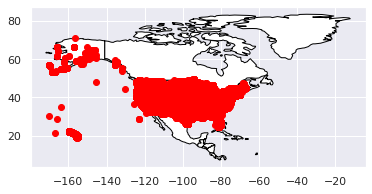

In [160]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
ax = world[world.continent == "North America"].plot(color="white", edgecolor="black")
# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red")

plt.show()

In [161]:
gdf.to_file(
    "race-shapefile/df_cleaned_geocoding_tweets_with_race.geojson", driver="GeoJSON"
)

ERROR:fiona._env:race-shapefile/df_cleaned_geocoding_tweets_with_race.geojson: No such file or directory
